# Lab 2: Proximal gradient descent
Author : Pierre Ablin

In this lab, the goal is to implement proximal gradient descent, and look at its behavior. We will implement it for the Lasso, and some $\ell_1$ regularized problems.


In the following, `X` is a $n\times p$ matrix and $y$ a vector of size `n`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 5
p = 10
X = np.random.randn(n, p)
y = np.random.randn(n)
w = np.random.randn(p)
lbda = 0.5

**Exercise 1**: Implement an algorithm that computes the value of the lasso function, and of the gradient of the smooth part. We recall that the cost function is

$$\min_w \frac12\|Xw - y\|^2 + \lambda\|w\|_1$$

In [4]:
def lasso_cost(w, X, y, lbda):
    # smooth term
    smooth_term = np.dot(X, w) - y
    smooth_term = 1 / 2 * np.dot(smooth_term, smooth_term)

    # not smooth term
    not_smooth_term = lbda * abs(w).sum()

    # lasso cost
    cost = smooth_term + not_smooth_term 

    return cost


def lasso_gradient(w, X, y):
    # compute grad
    grad = X.T @ (X @ w - y) 

    return grad

**Exercise 2** Implement the proximal operator of the $\ell_1$ norm, a.k.a. the soft thresholding operator:

$$\mathrm{ST}(x, u) = \begin{cases}x - u \text{ if } x > u\\ 0 \text{ if } -u \leq x \leq u \\ x+ u \text{ else}\end{cases}$$

It should be vectorized, so that when $x$ is a vector it takes the soft-threshloding of each coordinate.
Plot it in 1-D.

In [6]:
def soft_thresholding(x, u):
    # implementation using indicators
    return (x - u) * (x > u) + (x + u) * (x < -u)

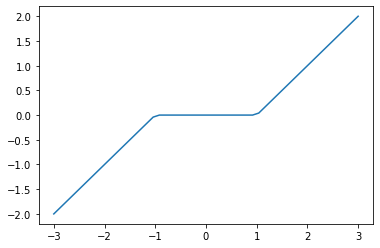

In [7]:
# plot of soft_thresholding
interval = [-3, 3]
t = np.linspace(*interval)

plt.plot(t, soft_thresholding(t, 1))

In [ ]:
x = np.linspace(-2, 2)
plt.plot(x, soft_thresholding(x, 1))

**Exercise 3** Demonstrate that if $\lambda \geq \lambda_{\max} \triangleq \max_{i=1, \dots, p} |[X^{\top}y]_i|$ then $0$ is a solution of the Lasso. 


As a consequence, we take for $\lambda$ a fraction of $\lambda_{\max}$, for instance $\lambda = 0.5 \lambda_{\max}$:

In [ ]:
lambda_max = np.max(np.abs(X.T.dot(y)))
lbda = 0.5 * lambda_max

**Exercise 4** Implement proximal gradient descent with a step size `step` for `n_iters` iterations, starting from $w^0=0$.  Display the evolution of $f(x_n) - f^*$ for this problem, with 100 iterations and the classical step size $1/L$. You can compute $f^*$ by running the algorithm for many iterations.

In [16]:
def proximal_gradient_descent(X, y, lbda, step=0, n_iters=100):
    # params
    n, p = X.shape
    w = np.zeros(p)
    w_list = []
    # smoothness const
    smoothness_const = max(np.linalg.eigvalsh(X.T @ X))

    for i in range(n_iters):
        # prox argument 
        prox_arg = w - 1 / smoothness_const * lasso_gradient(w, X, y)
        # prox subscript
        prox_subscript = lbda / smoothness_const
        
        # update omega
        w = soft_thresholding(prox_arg, prox_subscript)

        # save
        w_list.append(w.copy())
        
    return w, w_list  # returns the value of w and the list of iterates

In [17]:
step = 0 # your code here
n_iters = 100
w, w_list = proximal_gradient_descent(X, y, lbda, step, n_iters)

Text(0, 0.5, 'f - f^*')

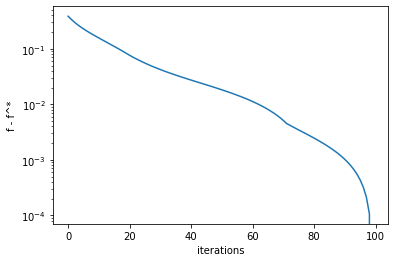

In [21]:
f_vals = np.array([lasso_cost(w, X, y, lbda) for w in w_list])
f_star = np.min(f_vals)


plt.semilogy(f_vals - f_star)
plt.xlabel('iterations')
plt.ylabel('f - f^*')

Text(0, 0.5, '||x - x^*||')

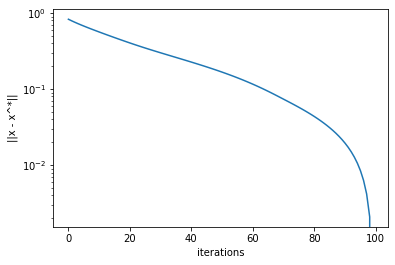

In [23]:
w_star = w_list[-1]
dists = [np.linalg.norm(w - w_star) for w in w_list]

plt.semilogy(dists)
plt.xlabel('iterations')
plt.ylabel('||x - x^*||')

**Exercise 5** what do you notice about the optimal $w$?

**Exercice 6** Generate a problem with $n=50$, $p=100$ where the conditioning is $~1 / 100$. For various values of $\lambda$, what convergence curves do you see?

In [76]:
n, p = 50, 100

y = np.random.randn(n)

# generate random matrix X (n, p)
random_matrix = np.random.randn(n, p)

# svd decomposition
U, _, V = np.linalg.svd(
    random_matrix, 
    full_matrices=False
)

# create diagonal 
max_sigma = 10
diagonal = np.array(
    # diagonal
    [max_sigma] + [1 for i in range(n - 1)], 
    dtype=float
)

diag_matrix = np.diag(diagonal)

# create X
X = U @ diag_matrix @ V


In [81]:
np.linalg.eigvalsh(X @ X.T)

array([  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1., 100.])

# Different regularizations

We now consider $A$ a $p \times p$ matrix, and consider the problem
$$
\min_{w} \frac12\|Xw - y\|^2 + \lambda \|Aw\|_1
$$

In order to implement the proximal gradient descent, we need to compute the proximal operator of the second term.

We define $R(w) = \lambda\|Aw\|_1$.

**Exercise 7** Assume that $A$ is diagonal with coefficients $a_1, \dots, a_p$. What is $\mathrm{prox}_R(w)$?

**Exercise 8** Assume that $A$ is orthogonal, i.e. $AA^{\top} = I_p$. What is $\mathrm{prox}_R(w)$?

Hint: Let $\min_{x} F(x, w)= \frac12\|x - w\|^2 + \lambda\|Ax\|_1$. What does the change of variable $z = Ax$ give?

**Exercice 9** In general, when $A$ is neither diagonal nor orthogonal, we do not have a closed-form expression of the proximal operator of $R$. 

We can instead resort once again to an iterative algorithm to compute it.


Prove that $\mathrm{prox}_{\lambda R(w)} = A^{-1} \phi(w, A^{-1}, \lambda)$ where $\phi(w, B, \lambda) = \arg\min_z \frac12\|Bz - w\| +\lambda \|z\|_1$

What problem do you recognize? 